# Make a character network from a text


In [1]:
import nbtext as nb
from nbtext import Corpus
%matplotlib inline

In [73]:
def check_navn(navn, limit=2, remove='Ja Nei Unnskyld Ikke Ah Hmm'.split()):
    """Removes all items in navn with frequency below limit and words in all case as well as all words in list 'remove'"""
    r = {x:navn[x] for x in navn if navn[x] > limit and x.upper() != x and not x in remove}
    return r

def check_edges(G, weight=1):
    import networkx as nx
    
    return nx.Graph([edge for edge in G.edges(data=True) if edge[2]['weight'] >= weight])


# Select a list of books


In [52]:
bøker = nb.get_urn({'title':'krig%', 'author':"tols%", 'trans':'', 'year':1800, 'next':250, 'limit':130})

bøker

[[2007041101090, 'Tolstoj, L.N.', 'Krig og fred', 1962],
 [2008110400150, 'Tolstoj, L.N.', 'Krig og fred', 2001],
 [2012011008041, 'Tolstoj, L.N.', 'Krig og fred', 1951],
 [2015110507062, 'Tolstoj, L.N.', 'Krig og fred', 1928],
 [2014100308012, 'Tolstoj, L.N.', 'Krig og fred', 1929],
 [2011061508081, 'Tolstoj, L.N.', 'Krig og fred', 2008],
 [2007041001053, 'Tolstoj, L.N.', 'Krig og fred', 1962],
 [2011063022003, 'Tolstoj, L.N.', 'Krig og fred', 1967],
 [2007050801009, 'Tolstoj, L.N.', 'Krig og fred', 1968],
 [2008011501085, 'Tolstoj, L.N.', 'Krig og fred', 1993],
 [2014101408145, 'Tolstoj, L.N.', 'Krig og fred', 1929],
 [2011063022002, 'Tolstoj, L.N.', 'Krig og fred', 1967],
 [2011081020006, 'Tolstoj, L.N.', 'Krig og fred', 1968],
 [2015091406029, 'Tolstoj, L.N.', 'Krig og fred', 1929],
 [2008102204034, 'Tolstoj, L.N.', 'Krig og fred', 2000],
 [2007111900105, 'Tolstoj, L.N.', 'Krig og fred', 1993],
 [2008042400005, 'Tolstoj, L.N.', 'Krig og fred', 1951],
 [2007050800051, 'Tolstoj, L.N.

### Assign a select book to variable 'bok'

In [30]:
book =[2011061508082, 'Tolstoj, L.N.', 'Krig og fred', 2008]

Compute the candidates for characters - anything starting with a capital letter that could be a person name or place name

In [31]:
book_names_raw = nb.navn(book)

### Edit names, remove some words

Rerun from here and change parameters

In [33]:
book_names = check_navn(book_names_raw, 20)
print([x for x in book_names])

['Aleksander', 'Alpatytsj', 'Andrej', 'Andrejs', 'Anna', 'Araktsjejev', 'Austerlitz', 'Balasjev', 'Barclay', 'Beausset', 'Bennigsen', 'Bogutsjarovo', 'Bolkonskij', 'Boris', 'Borodino', 'Bourienne', 'Davout', 'Denisov', 'Deres', 'Dessalles', 'Dolokhov', 'Dron', 'Dunjasja', 'Europa', 'Fjodor', 'Frankrike', 'Gerasim', 'Gory', 'Gud', 'Guds', 'Helene', 'Iljin', 'Jermolov', 'Karatajev', 'Kreml', 'Kutuzov', 'Kuzminisjna', 'Lysyje', 'Majestet', 'Mana', 'Maria', 'Mavra', 'Michaud', 'Mile', 'Moscou', 'Moskva', 'Moskvas', 'Murat', 'Napoleon', 'Napoleons', 'Natasja', 'Natasjas', 'Nikolaj', 'Nikolenka', 'Paris', 'Pavlovna', 'Petersburg', 'Petja', 'Pfuhl', 'Pierre', 'Pierres', 'Platon', 'Rastoptsjin', 'Rostov', 'Rostovs', 'Russland', 'Russlands', 'Smolensk', 'Sonja', 'Tikhon', 'Vasilij', 'Veresjtsjagin', 'Vilna']


## Create the network

In [75]:
network_raw = nb.make_network(book, book_names)

In [79]:
network = check_edges(network_raw, weight=20)

In [80]:
nb.central_betweenness_characters(network)

[('Pierre', 0.32640953817424406),
 ('Maria', 0.21617467499820447),
 ('Moskva', 0.20400416576887165),
 ('Kutuzov', 0.16181258828317654),
 ('Andrej', 0.10873015873015875),
 ('Napoleon', 0.10322667528549886),
 ('Deres', 0.0837343484402308),
 ('Alpatytsj', 0.08083267495032201),
 ('Natasja', 0.05439919557566616),
 ('Rostov', 0.04286791639732816)]

True

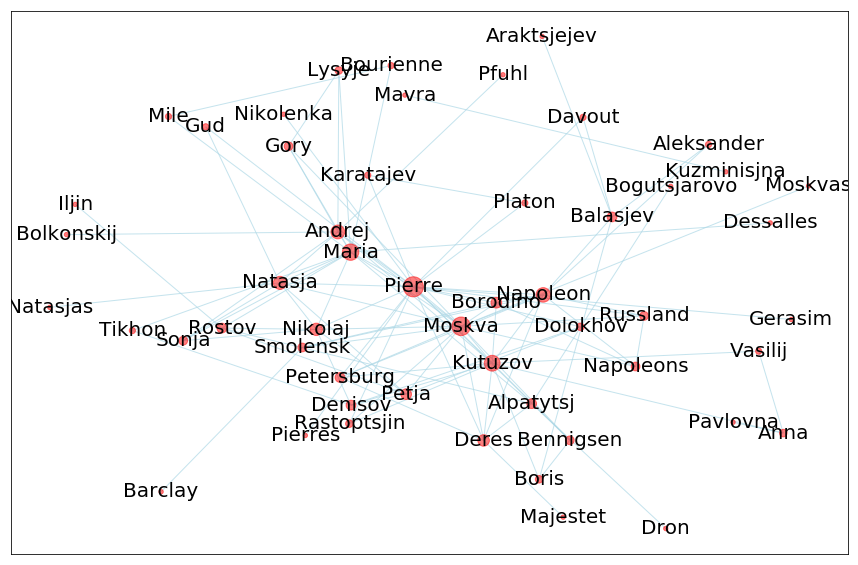

In [81]:
nb.draw_graph_centrality(network, k=2.5)